<a href="https://colab.research.google.com/github/ActiveStacks/DatasetOne/blob/main/Final1_EXPERIMENT_GRAPHCODEBERTLLM_1E7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
import torch
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
    # QARK: Quick Android Review Kit (Vulnerability Scanner)
    # QARK SCANNED DATASET
# path1 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Qark_Processed.csv')
# path2 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Qark_Processed.csv')
# path3 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Qark_Processed.csv')


    # MOBSF: Mobile Security Framework (Vulnerability Scanner)
    # MOBSF SCANNED DATASET
# path4 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_MobSF_Processed.csv')
#path5 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_MobSF_Processed.csv')
# path6 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_MobSF_Processed.csv')

    # COMBINED DATASET
path7 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Combined_Processed.csv')
# path8 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Combined_Processed.csv')
# path9 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Combined_Processed.csv')

In [ ]:
df = pd.read_csv(path7)

<ipython-input-4-a0e962f47e45>:1: DtypeWarning: Columns (1,2,3,5,6,10,11,12,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path7)


In [ ]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,// Copyright 2019 Matthew Chandler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,//user_comment,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,package org.mattvchandler.a2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package org.mattvchandler.a2050,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import android.animation.ArgbEvaluator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.animation.ArgbEvaluator,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import android.app.Dialog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.app.Dialog,NaN,NaN,NaN


In [ ]:
df.dropna()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name


In [ ]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,// Copyright 2019 Matthew Chandler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,//user_comment,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,package org.mattvchandler.a2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package org.mattvchandler.a2050,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import android.animation.ArgbEvaluator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.animation.ArgbEvaluator,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import android.app.Dialog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.app.Dialog,NaN,NaN,NaN


In [ ]:
df.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
860454,1215439,NaN,NaN,NaN,public class SettingsViewModel extends ViewModel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public class SettingsViewModel extends ViewModel,NaN,NaN,NaN
860455,1215440,NaN,NaN,NaN,public MutableLiveData<String> detailTitleChan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public MutableLiveData<String> detailTitleChan...,NaN,NaN,NaN
860456,1215441,NaN,NaN,NaN,"Log.e(TAG, ""Uncaught exception in "" + t + "": ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"Log.e(TAG, ""user_str"" + t + ""user_str"" + Log....",NaN,NaN,NaN
860457,1215520,NaN,NaN,NaN,registerReceiver(new BroadcastReceiver() {,NaN,NaN,NaN,CWE-925,Improper Verification of Intent by Broadcast R...,NaN,NaN,NaN,1,registerReceiver(new BroadcastReceiver() {,broadcast,VULNERABILITY,Dynamic broadcast receiver found
860458,1215546,NaN,NaN,NaN,browserWebview.getSettings().setJavaScriptEnab...,NaN,NaN,NaN,CWE-939,Improper Authorization in Handler for Custom U...,NaN,NaN,NaN,1,browserWebview.getSettings().setJavaScriptEnab...,webview,WARNING,Javascript enabled in Webview


In [ ]:
df.shape

(860459, 18)

In [ ]:
df.describe()

,index,CVSS,Vulnerability_status
count,8.604590e+05,10916.000000,860459.000000
mean,4.759812e+05,6.312156,0.014804
std,3.188582e+05,1.647439,0.120767
min,0.000000e+00,0.000000,0.000000
25%,2.151145e+05,4.300000,0.000000
50%,4.302290e+05,7.500000,0.000000
75%,6.974095e+05,7.500000,0.000000
max,1.215546e+06,8.800000,1.000000


In [ ]:
df.columns

Index(['index', 'Description', 'Type', 'Pattern', 'Code', 'Severity',
       'Input Case', 'CVSS', 'CWE_ID', 'CWE_Desc', 'OWASP_Mobile',
       'OWSAP_MASVS', 'Reference', 'Vulnerability_status', 'processed_code',
       'category', 'severity', 'qark_name'],
      dtype='object')

In [ ]:
df.nunique()

,0
index,860459
Description,26
Type,4
Pattern,26
Code,851301
Severity,4
Input Case,2
CVSS,10
CWE_ID,21
CWE_Desc,22


In [ ]:
df['Vulnerability_status'].unique()

array([0, 1])

In [ ]:
print(df['Vulnerability_status'].value_counts())

Vulnerability_status
0    847721
1     12738
Name: count, dtype: int64


In [ ]:
df_safe = df[df['Vulnerability_status']==0]

In [ ]:
df_vulnerable = df[df['Vulnerability_status']==1]

In [ ]:
df_safe.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,// Copyright 2019 Matthew Chandler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,//user_comment,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,package org.mattvchandler.a2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package org.mattvchandler.a2050,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import android.animation.ArgbEvaluator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.animation.ArgbEvaluator,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import android.app.Dialog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.app.Dialog,NaN,NaN,NaN


In [ ]:
df_safe.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
860452,1215437,NaN,NaN,NaN,public LiveData<Boolean> getDatabaseCreated(),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public LiveData<Boolean> getDatabaseCreated(),NaN,NaN,NaN
860453,1215438,NaN,NaN,NaN,return isDatabaseCreated;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,return isDatabaseCreated;,NaN,NaN,NaN
860454,1215439,NaN,NaN,NaN,public class SettingsViewModel extends ViewModel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public class SettingsViewModel extends ViewModel,NaN,NaN,NaN
860455,1215440,NaN,NaN,NaN,public MutableLiveData<String> detailTitleChan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public MutableLiveData<String> detailTitleChan...,NaN,NaN,NaN
860456,1215441,NaN,NaN,NaN,"Log.e(TAG, ""Uncaught exception in "" + t + "": ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"Log.e(TAG, ""user_str"" + t + ""user_str"" + Log....",NaN,NaN,NaN


In [ ]:
df_vulnerable.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
80,80,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""MainActivity"", ""Could not get data dire...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", ""user_str"", e)",NaN,NaN,NaN
304,304,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,System.out.printf(prompt);,info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,System.out.printf(prompt);,NaN,NaN,NaN
308,308,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,System.out.println(shell.runCommand(cmd));,info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,System.out.println(shell.runCommand(cmd));,NaN,NaN,NaN
332,332,App can write to App Directory. Sensitive Info...,RegexOr,"['MODE_PRIVATE', 'Context\\.MODE_PRIVATE']",val sp = app.getPreferences(Context.MODE_PRIVATE),info,exact,3.9,CWE-276,Incorrect Default Permissions,NaN,MSTG-STORAGE-14,NaN,1,val sp = app.getPreferences(Context.MODE_PRIVATE),NaN,NaN,NaN
516,516,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.d(TAG, ""Failed to parse color"", e);",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(TAG, ""user_str"", e);",NaN,NaN,NaN


In [ ]:
df_vulnerable.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
860396,1215380,NaN,NaN,NaN,null));,NaN,NaN,NaN,CWE-312,Cleartext Storage of Sensitive Information,NaN,NaN,NaN,1,null));,file,INFO,Hardcoded HTTP url found
860397,1215382,NaN,NaN,NaN,private DownloadInfo info = new DownloadInfo(U...,NaN,NaN,NaN,CWE-312,Cleartext Storage of Sensitive Information,NaN,NaN,NaN,1,private DownloadInfo info = new DownloadInfo(U...,file,INFO,Hardcoded HTTP url found
860398,1215383,NaN,NaN,NaN,String path = Environment.getExternalStoragePu...,NaN,NaN,NaN,CWE-921,Storage of Sensitive Data in a Mechanism witho...,NaN,NaN,NaN,1,String path = Environment.getExternalStoragePu...,file,WARNING,External storage used
860457,1215520,NaN,NaN,NaN,registerReceiver(new BroadcastReceiver() {,NaN,NaN,NaN,CWE-925,Improper Verification of Intent by Broadcast R...,NaN,NaN,NaN,1,registerReceiver(new BroadcastReceiver() {,broadcast,VULNERABILITY,Dynamic broadcast receiver found
860458,1215546,NaN,NaN,NaN,browserWebview.getSettings().setJavaScriptEnab...,NaN,NaN,NaN,CWE-939,Improper Authorization in Handler for Custom U...,NaN,NaN,NaN,1,browserWebview.getSettings().setJavaScriptEnab...,webview,WARNING,Javascript enabled in Webview


In [ ]:
# DATA IMBALANCE CORRECTION VIA RANDOM UNDERSAMPLING OF MAJORITY DATA

In [ ]:
df_safe_sampled = df_safe.sample(len(df_vulnerable), random_state = 42)

In [ ]:
df_balanced = pd.concat([df_safe_sampled, df_vulnerable])

In [ ]:
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [ ]:
print(df_balanced['Vulnerability_status'].value_counts())

Vulnerability_status
0    12738
1    12738
Name: count, dtype: int64


In [ ]:
print(df_balanced.value_counts())

Series([], Name: count, dtype: int64)


<Axes: >

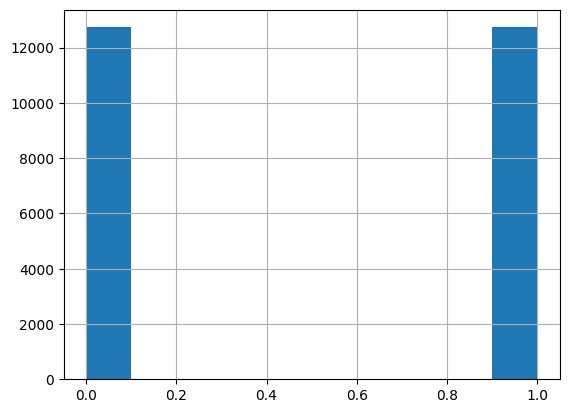

In [ ]:
df_balanced['Vulnerability_status'].hist()

In [ ]:
df_balanced.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,616861,NaN,NaN,NaN,final boolean jobWasScheduledForNight = params...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,final boolean jobWasScheduledForNight = params...,NaN,NaN,NaN
1,1165256,NaN,NaN,NaN,"""\uD840\uDC00-\uD87F\uDFFD"" +",NaN,NaN,NaN,CWE-200,Exposure of Sensitive Information to an Unauth...,NaN,NaN,NaN,1,"""\uD840\uDC00-\uD87F\uDFFD"" +",file,INFO,Potential API Key found
2,267870,NaN,NaN,NaN,private boolean minimized;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,private boolean minimized;,NaN,NaN,NaN
3,10678,NaN,NaN,NaN,mQuickFixBtn1.setContentDescription(getResourc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,mQuickFixBtn1.setContentDescription(getResourc...,NaN,NaN,NaN
4,302855,NaN,NaN,NaN,public void cancelDateTimer(){,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public void cancelDateTimer(){,NaN,NaN,NaN


In [ ]:
df_balanced.drop(['Severity', 'Description','Code', 'CWE_ID','CWE_Desc'], axis=1, inplace=True)

In [ ]:
df_balanced.head(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,616861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,final boolean jobWasScheduledForNight = params...,NaN,NaN,NaN
1,1165256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"""\uD840\uDC00-\uD87F\uDFFD"" +",file,INFO,Potential API Key found
2,267870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,private boolean minimized;,NaN,NaN,NaN
3,10678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,mQuickFixBtn1.setContentDescription(getResourc...,NaN,NaN,NaN
4,302855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public void cancelDateTimer(){,NaN,NaN,NaN
5,561711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,private Boolean updateCloseSensors_is_running ...,NaN,NaN,NaN
6,850209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,case ReturnState.STATE_WARNING:,NaN,NaN,NaN
7,791430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public static int DISABLE_FRAGMENT_ANIMATIONS ...,NaN,NaN,NaN
8,9427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,* This program is distributed in the hope that...,NaN,NaN,NaN
9,2796,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"s_username = ""user_str"";",NaN,NaN,NaN


In [ ]:
df_balanced.tail(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
25466,558219,Regex,setVisibility\(View\.GONE\)|setVisibility\(Vie...,exact,4.3,M1: Improper Platform Usage,MSTG-STORAGE-7,NaN,1,holder.custom_feature_timed_mute.setVisibility...,NaN,NaN,NaN
25467,260429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,mEmptyView.setVisibility(show ? View.VISIBLE :...,NaN,NaN,NaN
25468,387784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,QuerySelection query = new QuerySelection(sele...,NaN,NaN,NaN
25469,695584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,boolean incrementEven = false;,NaN,NaN,NaN
25470,45995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"this.commands.add(new Command(commands, code, ...",NaN,NaN,NaN
25471,786947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,value = val_TireState != null ? val_TireState[...,NaN,NaN,NaN
25472,1083203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,final String targeted_folder = sharedpreferenc...,file,WARNING,External storage used
25473,249457,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(""user_str"", ""user_str"" + fname + ""user_s...",NaN,NaN,NaN
25474,389726,Regex,setVisibility\(View\.GONE\)|setVisibility\(Vie...,exact,4.3,M1: Improper Platform Usage,MSTG-STORAGE-7,NaN,1,findViewById(R.id.tabscontainer).setVisibility...,NaN,NaN,NaN
25475,703527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,if (parseFieldDivider) {,NaN,NaN,NaN


In [ ]:
df_balanced.dropna()

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name


In [ ]:
df_balanced = df_balanced[['processed_code', 'Vulnerability_status']]

In [ ]:
df_balanced.head()

,processed_code,Vulnerability_status
0,final boolean jobWasScheduledForNight = params...,0
1,"""\uD840\uDC00-\uD87F\uDFFD"" +",1
2,private boolean minimized;,0
3,mQuickFixBtn1.setContentDescription(getResourc...,0
4,public void cancelDateTimer(){,0


In [ ]:
df_balanced.columns = ['text', 'labels']

In [ ]:
df_balanced.head(5)

,text,labels
0,final boolean jobWasScheduledForNight = params...,0
1,"""\uD840\uDC00-\uD87F\uDFFD"" +",1
2,private boolean minimized;,0
3,mQuickFixBtn1.setContentDescription(getResourc...,0
4,public void cancelDateTimer(){,0


In [ ]:
df_balanced.head(5)

,text,labels
0,final boolean jobWasScheduledForNight = params...,0
1,"""\uD840\uDC00-\uD87F\uDFFD"" +",1
2,private boolean minimized;,0
3,mQuickFixBtn1.setContentDescription(getResourc...,0
4,public void cancelDateTimer(){,0


In [ ]:
df_balanced.to_csv('processed_dataset.csv', index=False)

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset, DatasetDict

In [ ]:
codes_dataset = load_dataset('csv', data_files='processed_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
codes_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 25476
    })
})

In [ ]:
# from posixpath import split
train_testvalid = codes_dataset['train'].train_test_split(test_size=0.4, seed=42)
test_valid = train_testvalid['test'].train_test_split(test_size=0.5)


In [ ]:
split_dataset = DatasetDict(
    {
        'train': train_testvalid['train'],
        'test' : test_valid['test'],
        'valid': test_valid['train']
    }
)

In [ ]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 15285
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 5096
    })
    valid: Dataset({
        features: ['text', 'labels'],
        num_rows: 5095
    })
})

In [ ]:
from transformers import AutoTokenizer
checkpoint = 'microsoft/graphcodebert-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/539 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [ ]:
def tokenize_function(sets):
  return tokenizer(sets['text'], truncation=True, padding=True)

In [ ]:
def tokenize_function(sets):
  if isinstance(sets['text'], list):
    sets['text'] =[str(text) for text in sets['text']]
  else:
      sets['text'] = str(sets['text'])
  return tokenizer(sets['text'],padding='max_length', truncation=True, max_length=512, return_tensors='pt')

In [ ]:
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/15285 [00:00<?, ? examples/s]

Map:   0%|          | 0/5096 [00:00<?, ? examples/s]

Map:   0%|          | 0/5095 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/graphcodebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

In [ ]:
summary(model)

Layer (type:depth-idx)                                            Param #
RobertaForSequenceClassification                                  --
├─RobertaModel: 1-1                                               --
│    └─RobertaEmbeddings: 2-1                                     --
│    │    └─Embedding: 3-1                                        38,603,520
│    │    └─Embedding: 3-2                                        394,752
│    │    └─Embedding: 3-3                                        768
│    │    └─LayerNorm: 3-4                                        1,536
│    │    └─Dropout: 3-5                                          --
│    └─RobertaEncoder: 2-2                                        --
│    │    └─ModuleList: 3-6                                       85,054,464
├─RobertaClassificationHead: 1-2                                  --
│    └─Linear: 2-3                                                590,592
│    └─Dropout: 2-4                                               --

In [ ]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                   save_strategy='epoch',
                                  num_train_epochs=4,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# def compute_metrics(logits_and_labels):
#   logits, labels = logits_and_labels
#   predictions = np.argmax(logits, axis=-1)
#   acc=np.mean(predictions == labels)
#   f1 = f1_score(labels, predictions, average = 'binary')
#   recalls = recall_score(labels, predictions, average = 'binary')
#   precisions = precision_score(labels, predictions, average = "binary")
#   return {'accuracy' : acc, 'recall' : recalls, 'precision' : precisions, 'f1':f1, }

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 9.5 MB/s eta 0:00:00


In [ ]:
import evaluate

In [ ]:

def compute_metrics(eval_pred):
  prec = evaluate.load("precision")
  rec = evaluate.load("recall")
  f1c = evaluate.load("f1")
  acc = evaluate.load("accuracy")
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)

  precisions=prec.compute(predictions=predictions, references=labels)
  recalls=rec.compute(predictions=predictions, references=labels)
  f1s=f1c.compute(predictions=predictions, references=labels)
  accs = acc.compute(predictions=predictions, references=labels)

  return {'accuracy' : accs, 'recall' : recalls, 'precision' : precisions, 'f1':f1s, }





In [ ]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['valid'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

<ipython-input-59-5bb568b18981>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,0.224200,0.150609,{'accuracy': 0.9609421000981354},{'recall': 0.9555297757153906},{'precision': 0.9671232876712329},{'f1': 0.9612915775141023}
2,0.111600,0.148911,{'accuracy': 0.9640824337585868},{'recall': 0.9636504253673627},{'precision': 0.9655172413793104},{'f1': 0.9645829301335398}
3,0.075300,0.170010,{'accuracy': 0.9640824337585868},{'recall': 0.9648105181747874},{'precision': 0.9644375724777735},{'f1': 0.9646240092789484}
4,0.052800,0.171971,{'accuracy': 0.9642787046123651},{'recall': 0.9675174013921114},{'precision': 0.9623076923076923},{'f1': 0.9649055148476668}


Trainer is attempting to log a value of "{'accuracy': 0.9609421000981354}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'recall': 0.9555297757153906}" of type <class 'dict'> for key "eval/recall" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.9671232876712329}" of type <class 'dict'> for key "eval/precision" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9612915775141023}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.9640824337585868}" of type <class 

TrainOutput(global_step=3824, training_loss=0.10557673965039113, metrics={'train_runtime': 2041.0877, 'train_samples_per_second': 29.955, 'train_steps_per_second': 1.874, 'total_flos': 1.60866099247104e+16, 'train_loss': 0.10557673965039113, 'epoch': 4.0})

In [ ]:
outcome= trainer.predict(tokenized_datasets['test'])

In [ ]:
print(outcome.metrics)

{'test_loss': 0.18607719242572784, 'test_accuracy': {'accuracy': 0.9644819466248038}, 'test_recall': {'recall': 0.9657853810264385}, 'test_precision': {'precision': 0.9639115250291036}, 'test_f1': {'f1': 0.9648475432122743}, 'test_runtime': 37.3907, 'test_samples_per_second': 136.29, 'test_steps_per_second': 2.14}
